In [23]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [24]:
# Load the dataset
# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv("C:/Users/91879/Downloads/ML - automobile mileage prediction/automobile mileage prediction/automobile data.csv")

In [25]:
# Display the first few rows of the dataset
print(df.head())

    MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  Model_year  \
0   8.0          8         307.0        130    3504          12.0        2015   
1  15.0          8         350.0        165    3693          11.5        2015   
2  18.0          8         318.0        150    3436          11.0        2015   
3  16.0          8         304.0        150    3433          12.0        2015   
4  17.0          8         302.0        140    3449          10.5        2015   

   Origin   Car_Name  
0       1  chevrolet  
1       1      buick  
2       1   plymouth  
3       1        amc  
4       1       ford  


In [27]:
# Display the tail of the dataset
print(df.tail())

      MPG  Cylinders  Displacement Horsepower  Weight  Acceleration  \
393  27.0          4         140.0         86    2790          15.6   
394  44.0          4          97.0         52    2130          24.6   
395  32.0          4         135.0         84    2295          11.6   
396  28.0          4         120.0         79    2625          18.6   
397  31.0          4         119.0         82    2720          19.4   

     Model_year  Origin    Car_Name  
393        2003       1        ford  
394        2003       2  volkswagen  
395        2003       1       dodge  
396        2003       1        ford  
397        2003       1   chevrolet  


In [26]:
# Check for missing values
print(df.isnull().sum())

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64


In [29]:
# Display the number of rows and columns
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 398
Number of columns: 9


In [30]:
# Display data types of each column
print(df.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower       object
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object


In [34]:
# Assuming 'column_name' is the column you want to convert
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')

# 'errors='coerce'' will replace any values that cannot be converted to numeric with NaN

In [35]:
# Display data types after conversion
print(df.dtypes)

MPG             float64
Cylinders         int64
Displacement    float64
Horsepower      float64
Weight            int64
Acceleration    float64
Model_year        int64
Origin            int64
Car_Name         object
dtype: object


In [36]:
# Impute missing values with the mean of each column
df.fillna(df.mean(), inplace=True)

C:\Users\91879\AppData\Local\Temp\ipykernel_6208\3312633011.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [39]:
from sklearn.impute import SimpleImputer

# Create a SimpleImputer with strategy 'mean' # advance method
imputer = SimpleImputer(strategy='mean')



In [43]:
# Check for missing values
missing_values = df.isnull().sum()

# Display the count of missing values for each column
print(missing_values)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64


In [46]:
# Check if there are any missing values in the entire DataFrame
any_missing = df.isnull().any().any()

# Display the result
print(f"Are there any missing values? {any_missing}")

Are there any missing values? False


In [48]:
# Impute missing values with the mean of each column
df_imputed = df.fillna(df.mean())

# Display the DataFrame after imputation
print(df_imputed)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0     8.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     Model_year  Origin    Car_Name  
0          2015       1   chevrolet  
1          2015       1       buick  
2          2015      

C:\Users\91879\AppData\Local\Temp\ipykernel_6208\1307919505.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_imputed = df.fillna(df.mean())


In [53]:
# Check for missing values after imputation
missing_values_after_imputation = df_imputed.isnull().sum()

# Display the count of missing values for each column after imputation
print(missing_values_after_imputation)

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model_year      0
Origin          0
Car_Name        0
dtype: int64


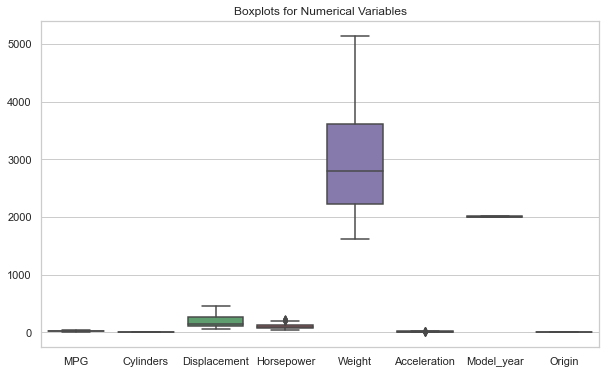

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Create boxplots for numerical variables
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_imputed, orient="v")
plt.title("Boxplots for Numerical Variables")
plt.show()

In [58]:
from scipy import stats

def remove_outliers(df, columns, threshold=3):
    """
    Remove outliers from specified numerical columns using Z-score method.

    Parameters:
    - df: DataFrame
    - columns: List of column names to remove outliers from
    - threshold: Z-score threshold for identifying outliers (default is 3)

    Returns:
    - DataFrame without outliers
    """
    df_no_outliers = df.copy()

    for column in columns:
        z_scores = stats.zscore(df_no_outliers[column])
        outliers = (z_scores > threshold) | (z_scores < -threshold)
        df_no_outliers[column][outliers] = None

    return df_no_outliers

C:\Users\91879\AppData\Local\Temp\ipykernel_6208\3798499399.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column][outliers] = None


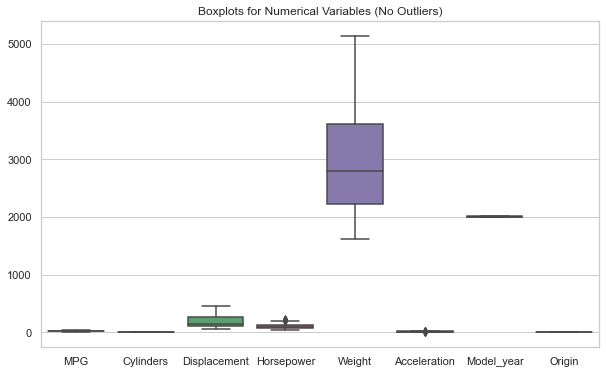

In [63]:
# Specify numerical columns for outlier removal
numerical_columns = ['MPG','Cylinders',  'Displacement']

# Remove outliers
df_no_outliers = remove_outliers(df_imputed, numerical_columns)

# Create boxplots for the new DataFrame without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, orient="v")
plt.title("Boxplots for Numerical Variables (No Outliers)")
plt.show()

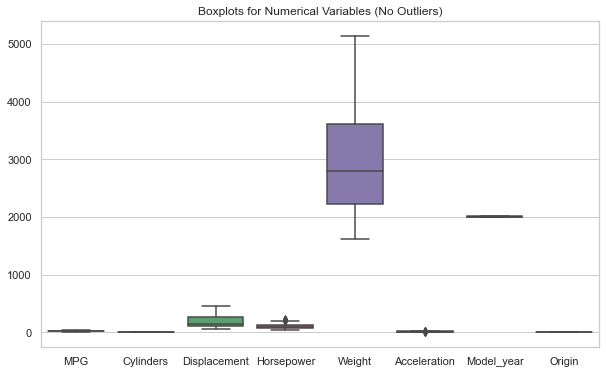

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt

# Create boxplots for the new DataFrame without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_no_outliers, orient="v")
plt.title("Boxplots for Numerical Variables (No Outliers)")
plt.show()

In [66]:
#------- Start EDA (Exploratory Data Analysis) --------------
#Check the distribution of Horsepower

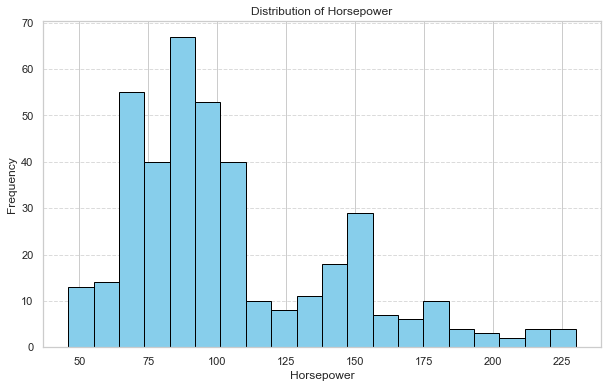

In [67]:
import matplotlib.pyplot as plt

# Create a histogram for the distribution of Horsepower
plt.figure(figsize=(10, 6))
plt.hist(df['Horsepower'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

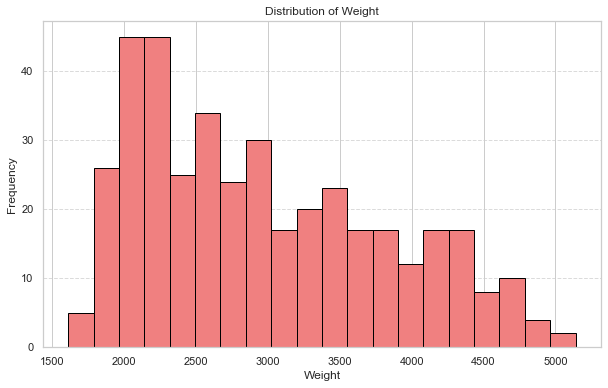

In [68]:
import matplotlib.pyplot as plt

# Create a histogram for the distribution of Weight
plt.figure(figsize=(10, 6))
plt.hist(df['Weight'], bins=20, color='lightcoral', edgecolor='black')
plt.title('Distribution of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

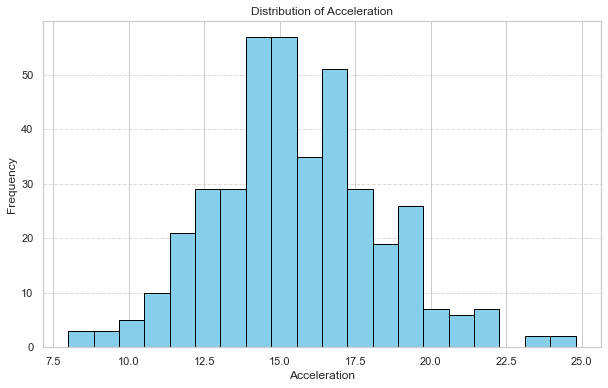

In [69]:
import matplotlib.pyplot as plt

# Create a histogram for the distribution of Acceleration
plt.figure(figsize=(10, 6))
plt.hist(df['Acceleration'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

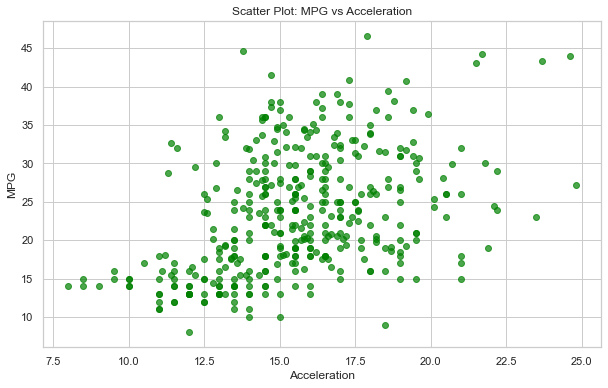

In [70]:
import matplotlib.pyplot as plt
#Scatter plot to find the correlation betweeen MPG and Acceleration
plt.figure(figsize=(10, 6))
plt.scatter(df['Acceleration'], df['MPG'], alpha=0.7, color='green')
plt.title('Scatter Plot: MPG vs Acceleration')
plt.xlabel('Acceleration')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

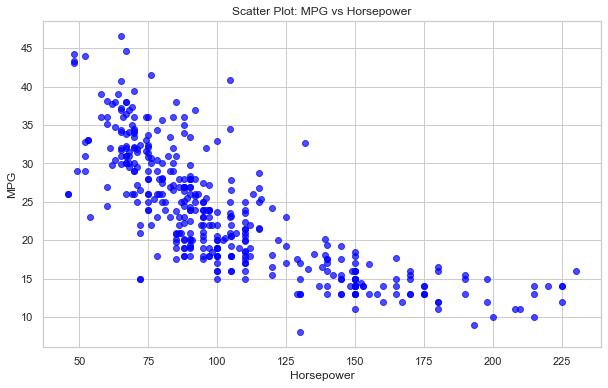

In [71]:
#Scatter plot to find the correlation betweeen MPG and Horsepower
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Horsepower'], df['MPG'], alpha=0.7, color='blue')
plt.title('Scatter Plot: MPG vs Horsepower')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

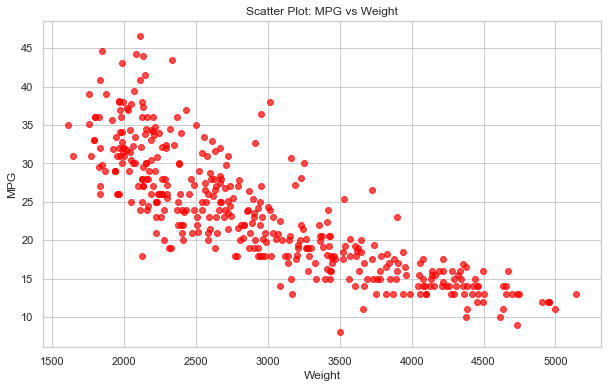

In [72]:
#Scatter plot to find the correlation betweeen MPG and Weight
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['MPG'], alpha=0.7, color='red')
plt.title('Scatter Plot: MPG vs Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
plt.grid(True)
plt.show()

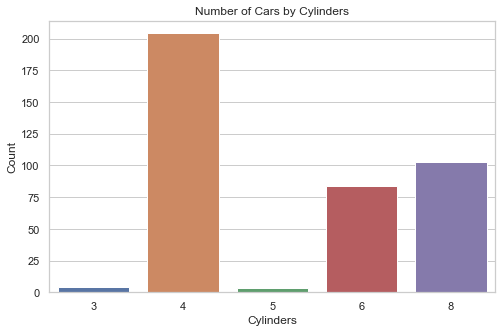

In [75]:
#Barplots:
 #No. of cars by cylinders
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Cylinders', data=df)
plt.title('Number of Cars by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Count')
plt.show()

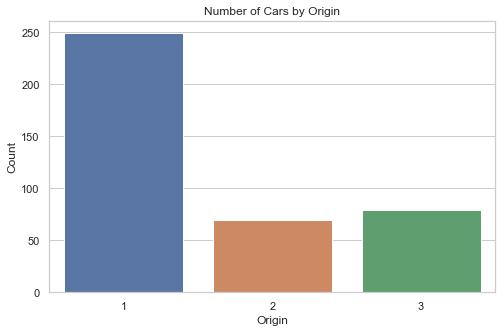

In [76]:
#No. of cars by Origin
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Origin', data=df)
plt.title('Number of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

In [77]:
#Check unique values in Origin variable
unique_origins = df['Origin'].unique()
print("Unique Values in Origin Variable:", unique_origins)

Unique Values in Origin Variable: [1 3 2]


In [78]:
#Replace 1 with US, 2 with Germany, 3 with Japan
df['Origin'].replace({1: 'US', 2: 'Germany', 3: 'Japan'}, inplace=True)

In [79]:
#Print unique entries from origin column again
print(df['Origin'].unique())

['US' 'Japan' 'Germany']


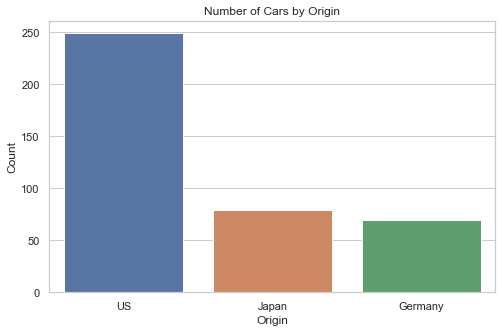

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Origin', data=df)
plt.title('Number of Cars by Origin')
plt.xlabel('Origin')
plt.ylabel('Count')
plt.show()

In [83]:
#Cylinders is a categorical variable hence change Cylinders to Object 
df['Cylinders'] = df['Cylinders'].astype('object')

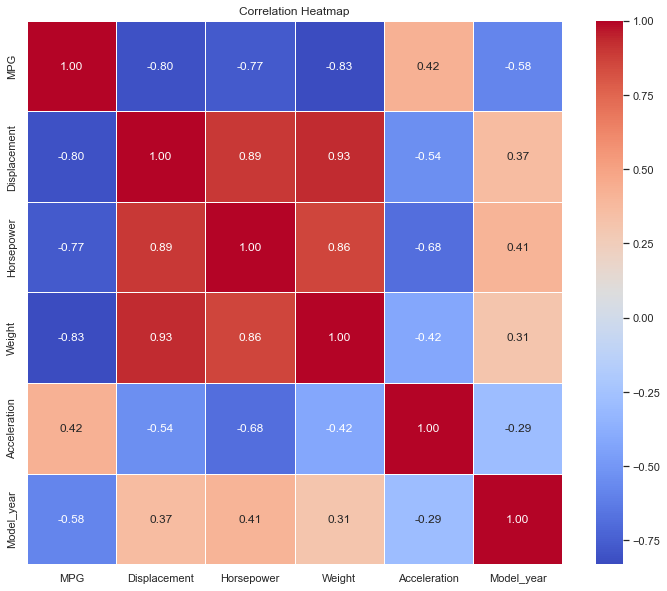

In [84]:
# Feature Selection: Print Correlation heatmap
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [90]:
# One-hot encoding (dummy conversion) ###delete this code if it doesnt execute
# Assuming 'Cylinders' and 'Origin' are categorical variables in your dataset
df = pd.get_dummies(df, columns=['Cylinders', 'Origin'], drop_first=True)

# Print the column names
print(df.columns)



Index(['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model_year', 'Car_Name', 'Cylinders_4', 'Cylinders_5', 'Cylinders_6',
       'Cylinders_8', 'Origin_Japan', 'Origin_US'],
      dtype='object')


In [93]:
# Display the updated dataframe
print(df.head())

    MPG  Displacement  Horsepower  Weight  Acceleration  Model_year  \
0   8.0         307.0       130.0    3504          12.0        2015   
1  15.0         350.0       165.0    3693          11.5        2015   
2  18.0         318.0       150.0    3436          11.0        2015   
3  16.0         304.0       150.0    3433          12.0        2015   
4  17.0         302.0       140.0    3449          10.5        2015   

    Car_Name  Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  \
0  chevrolet            0            0            0            1   
1      buick            0            0            0            1   
2   plymouth            0            0            0            1   
3        amc            0            0            0            1   
4       ford            0            0            0            1   

   Origin_Japan  Origin_US  
0             0          1  
1             0          1  
2             0          1  
3             0          1  
4             0    

In [94]:
#Create master data by combining numeric columns and dummies
# Select numeric columns
numeric_columns = ['MPG', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model_year']

# Create master data frame by combining numeric columns and dummy variables
master_df = pd.concat([df[numeric_columns], df[['Cylinders_4', 'Cylinders_5', 'Cylinders_6', 'Cylinders_8', 'Origin_Japan', 'Origin_US']]], axis=1)

# Display the first few rows of the master data frame
print(master_df.head())

    MPG  Displacement  Horsepower  Weight  Acceleration  Model_year  \
0   8.0         307.0       130.0    3504          12.0        2015   
1  15.0         350.0       165.0    3693          11.5        2015   
2  18.0         318.0       150.0    3436          11.0        2015   
3  16.0         304.0       150.0    3433          12.0        2015   
4  17.0         302.0       140.0    3449          10.5        2015   

   Cylinders_4  Cylinders_5  Cylinders_6  Cylinders_8  Origin_Japan  Origin_US  
0            0            0            0            1             0          1  
1            0            0            0            1             0          1  
2            0            0            0            1             0          1  
3            0            0            0            1             0          1  
4            0            0            0            1             0          1  


In [95]:
# Create X and Y
# Define features (X) and target variable (Y)
X = master_df.drop('MPG', axis=1)  # Features (excluding 'MPG')
Y = master_df['MPG']  # Target variable ('MPG')

# Display the first few rows of X and Y
print("Features (X):")
print(X.head())

print("\nTarget variable (Y):")
print(Y.head())

Features (X):
   Displacement  Horsepower  Weight  Acceleration  Model_year  Cylinders_4  \
0         307.0       130.0    3504          12.0        2015            0   
1         350.0       165.0    3693          11.5        2015            0   
2         318.0       150.0    3436          11.0        2015            0   
3         304.0       150.0    3433          12.0        2015            0   
4         302.0       140.0    3449          10.5        2015            0   

   Cylinders_5  Cylinders_6  Cylinders_8  Origin_Japan  Origin_US  
0            0            0            1             0          1  
1            0            0            1             0          1  
2            0            0            1             0          1  
3            0            0            1             0          1  
4            0            0            1             0          1  

Target variable (Y):
0     8.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: MPG, dtype: float64


In [96]:
#Export data from X to and excel file to see the final data
# Export features (X) to an Excel file
X.to_excel('features.xlsx', index=False)

In [97]:
# import library to split the training-test sample
from sklearn.model_selection import train_test_split

# Assuming X contains your features and Y contains your target variable
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# The test_size parameter specifies the proportion of the dataset to include in the test split.
# The random_state parameter is used for reproducibility. You can set it to any integer value.

# Print the shape of the training and testing sets to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (318, 11)
X_test shape: (80, 11)
y_train shape: (318,)
y_test shape: (80,)


In [101]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

# Assuming your features are stored in X and the target variable is in y
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [102]:
# Print the sample size

print(f"Training sample size: {len(X_train)}")
print(f"Test sample size: {len(X_test)}")

Training sample size: 318
Test sample size: 80


In [103]:
#import library for linear regression
from sklearn.linear_model import LinearRegression


LinearRegression()

In [104]:
# Create a linear regression model object
model = LinearRegression()
# Fit the model to the training data
model.fit(X_train, y_train)
# Goodness of fit (R-squared) on the training set
train_accuracy = model.score(X_train, y_train)
print(f"Training Accuracy (R-squared): {train_accuracy}")
# Predict y values for the test set
y_pred = model.predict(X_test)
# Check prediction accuracy on the test set
test_accuracy = model.score(X_test, y_test)
print(f"Test Accuracy (R-squared): {test_accuracy}")
# Create a linear regression model
model = LinearRegression()

Training Accuracy (R-squared): 0.8408150185859622
Test Accuracy (R-squared): 0.8593419308484477


In [106]:
# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [107]:
#Goodness of fit test: check the accuracy ot training model
# Calculate R-squared on the training set
train_r2 = model.score(X_train, y_train)

# Print the R-squared value
print(f'R-squared on training set: {train_r2}')

R-squared on training set: 0.8408150185859622


In [110]:
#predict y

# Predict the target variable for the test data
y_pred = model.predict(X_test)

In [111]:
#check prediction accuracy based on test sample
from sklearn.metrics import mean_squared_error

# Assuming y_test contains the actual values of your target variable for the test data
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 7.917142497282458
R-squared: 0.8593419308484477
